C:\Users\Vaishnavi Mohite\AppData\Local\Temp\ipykernel_3804\295617670.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['cpu_usage'].fillna(data['cpu_usage'].mean(), inplace=True)
C:\Users\Vaishnavi Mohite\AppData\Local\Temp\ipykernel_3804\295617670.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

Model Mean Absolute Error (Energy Efficiency Prediction): 0.15566052928939222
Baseline Power Consumption: 245.5592293828624
Optimized Power Consumption: 0.41498742780002407
Energy Savings (%): 99.83100312342445


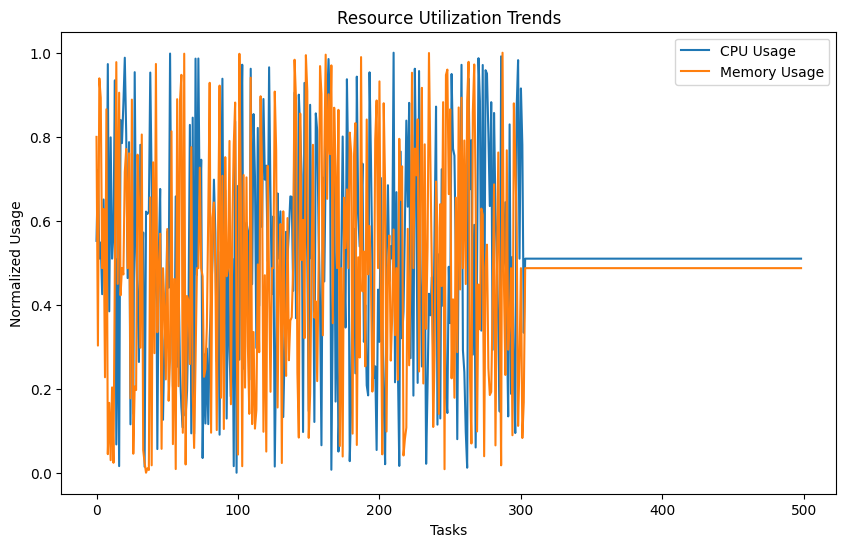

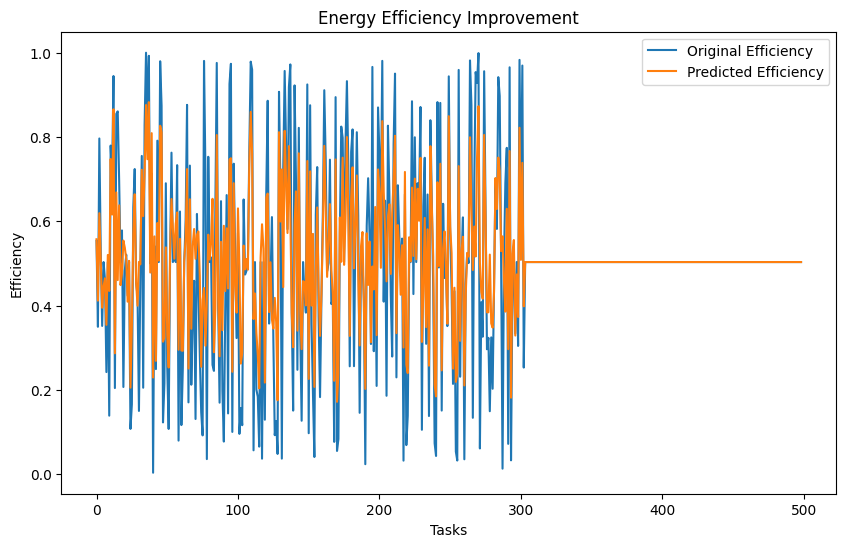

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Load the dataset
file_path = r'C:\Users\Vaishnavi Mohite\Downloads\ML MODEL ON\vmCloud.csv'
data = pd.read_csv(file_path)

# Step 1: Data Preprocessing
# Handle missing values (fill or drop)
data['cpu_usage'].fillna(data['cpu_usage'].mean(), inplace=True)
data['memory_usage'].fillna(data['memory_usage'].mean(), inplace=True)
data['network_traffic'].fillna(data['network_traffic'].mean(), inplace=True)
data['power_consumption'].fillna(data['power_consumption'].mean(), inplace=True)
data['execution_time'].fillna(data['execution_time'].mean(), inplace=True)
data['energy_efficiency'].fillna(data['energy_efficiency'].mean(), inplace=True)

# Feature engineering: Task energy ratio
data['task_energy_ratio'] = data['power_consumption'] / data['execution_time']

# Normalize numerical features
num_cols = ['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 'execution_time', 'task_energy_ratio']
data[num_cols] = (data[num_cols] - data[num_cols].min()) / (data[num_cols].max() - data[num_cols].min())

# Encode categorical features (if any)
data['task_priority'] = data['task_priority'].map({'low': 0, 'medium': 1, 'high': 2})
data['task_priority'].fillna(1, inplace=True)  # Default to medium

# Step 2: Energy-Efficient Task Scheduling
# Define features (X) and target (y)
X = data[['cpu_usage', 'memory_usage', 'network_traffic', 'execution_time', 'task_energy_ratio']]
y = data['energy_efficiency']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict energy efficiency
data['predicted_efficiency'] = rf_model.predict(X)
print("Model Mean Absolute Error (Energy Efficiency Prediction):", mean_absolute_error(y_test, rf_model.predict(X_test)))

# Resource Allocation: Sort tasks by priority and efficiency
allocation = data.sort_values(by=['task_priority', 'predicted_efficiency'], ascending=[False, False])

# Step 3: Resource Utilization Optimization
# Optimization for balancing CPU/memory across VMs
# Assume we aim to minimize the sum of CPU and memory deviations across tasks
c = -(data['cpu_usage'] + data['memory_usage']).values  # Minimize negative for maximization
A = np.eye(len(data))  # Constraints matrix
b = np.ones(len(data))  # Each task must be assigned once
bounds = [(0, 1) for _ in range(len(data))]  # Binary allocation

result = linprog(c, A_eq=[np.ones(len(data))], b_eq=[1], bounds=bounds, method='highs')
data['optimized_allocation'] = result.x.round()

# Step 4: Renewable Energy Integration
# Simulate renewable energy availability (e.g., random availability between 0 and 1)
data['renewable_energy_availability'] = np.random.rand(len(data))

# Step 5: Performance Monitoring
# Compare power usage before and after optimization
baseline_power = data['power_consumption'].sum()
optimized_power = (data['power_consumption'] * data['optimized_allocation']).sum()

print("Baseline Power Consumption:", baseline_power)
print("Optimized Power Consumption:", optimized_power)
print("Energy Savings (%):", ((baseline_power - optimized_power) / baseline_power) * 100)

# Step 6: Visualization
# Resource utilization trends
plt.figure(figsize=(10, 6))
plt.plot(data['cpu_usage'], label='CPU Usage')
plt.plot(data['memory_usage'], label='Memory Usage')
plt.title('Resource Utilization Trends')
plt.xlabel('Tasks')
plt.ylabel('Normalized Usage')
plt.legend()
plt.show()

# Energy efficiency improvement
plt.figure(figsize=(10, 6))
plt.plot(data['energy_efficiency'], label='Original Efficiency')
plt.plot(data['predicted_efficiency'], label='Predicted Efficiency')
plt.title('Energy Efficiency Improvement')
plt.xlabel('Tasks')
plt.ylabel('Efficiency')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
file_path = r'C:\Users\Vaishnavi Mohite\Downloads\ML MODEL ON\archive (3)\vmCloud_data.csv'
data = pd.read_csv(file_path)

# Check for missing values and basic information
print("Dataset Information:")
data.info()

# Display the first few rows of the dataset
print("\nPreview of Dataset:")
print(data.head())

# Select relevant features and handle missing values
data_clean = data[['cpu_usage', 'memory_usage', 'energy_efficiency']].dropna()

# Normalize the data (between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_clean)

# Convert data into time-series format
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step, 0])  # Predicting CPU usage
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Split data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(time_step, X.shape[2])))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
print("Training the LSTM model...")
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
print("Evaluating the model...")
y_pred = model.predict(X_test)

# Flatten predictions and ground truth for evaluation metrics
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test_flat, y_pred_flat)
mae = np.mean(np.abs(y_test_flat - y_pred_flat))  # Directly calculate MAE
rmse = np.sqrt(mse)
r2 = r2_score(y_test_flat, y_pred_flat)

# Print evaluation metrics
print("\nModel Evaluation Metrics:")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score (Accuracy): {r2:.2f}')

# Dynamic Resource Allocation Logic
def allocate_resources(predicted_usage, current_usage, threshold=0.8):
    if predicted_usage > threshold * current_usage:
        return 'Scale Up'
    elif predicted_usage < 0.5 * current_usage:
        return 'Scale Down'
    else:
        return 'Maintain'

# Predict for the entire dataset in chunks to avoid memory issues
print("Generating predictions for the entire dataset...")
chunk_size = 10000
scaled_predictions_cpu = []
for i in range(0, len(X), chunk_size):
    chunk_predictions = model.predict(X[i:i + chunk_size])
    scaled_predictions_cpu.extend(chunk_predictions.flatten())

# Reverse the scaling for CPU predictions (from [0,1] to the original range)
scaled_predictions_cpu = np.array(scaled_predictions_cpu)
scaled_predictions_cpu = scaler.inverse_transform(np.column_stack(
    (scaled_predictions_cpu, np.zeros_like(scaled_predictions_cpu), np.zeros_like(scaled_predictions_cpu))
))[:, 0]

# Ensure the predicted CPU values are within 0-100%
scaled_predictions_cpu = np.clip(scaled_predictions_cpu, 0, 100)

# Simulate decisions for the entire dataset
allocations = [
    allocate_resources(pred, curr) for pred, curr in zip(scaled_predictions_cpu, y.flatten())
]

# Save the predictions to Excel with multiple sheets
print("Saving predictions to Excel...")
predictions_df = pd.DataFrame({
    'Actual CPU Usage (%)': y.flatten() * 100,  # CPU usage as percentage
    'Predicted CPU Usage (%)': scaled_predictions_cpu,  # CPU usage as percentage
    'Actual Memory Usage (MB)': data_clean['memory_usage'].iloc[:len(y)].values,  # Memory usage in MB
    'Energy Efficiency (Wh)': data_clean['energy_efficiency'].iloc[:len(y)].values,  # Energy Efficiency in Wh
    'Allocation Decision': allocations
})

output_file_path = r'C:\Users\Vaishnavi Mohite\Downloads\predictions_with_units_split.xlsx'
max_rows_per_sheet = 1048576
num_sheets = (len(predictions_df) // max_rows_per_sheet) + 1

from pandas import ExcelWriter
with ExcelWriter(output_file_path) as writer:
    for i in range(num_sheets):
        start_row = i * max_rows_per_sheet
        end_row = start_row + max_rows_per_sheet
        predictions_df.iloc[start_row:end_row].to_excel(writer, sheet_name=f'Sheet_{i+1}', index=False)

print(f"Predictions saved in multiple sheets to: {output_file_path}")

# Plot training vs validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot predicted vs actual CPU usage
plt.figure(figsize=(12, 6))
plt.plot(scaled_predictions_cpu, label='Predicted CPU Usage (%)', color='blue')
plt.plot(y.flatten() * 100, label='Actual CPU Usage (%)', color='red', linestyle='dashed')
plt.title("Predicted vs Actual CPU Usage for Entire Dataset")
plt.xlabel('Time')
plt.ylabel('CPU Usage (%)')
plt.legend()
plt.show()

# Plot energy efficiency over time
plt.figure(figsize=(12, 6))
plt.plot(data_clean['energy_efficiency'], label='Energy Efficiency (Wh)', color='green')
plt.title("Energy Efficiency Over Time")
plt.xlabel('Time')
plt.ylabel('Energy Efficiency (Wh)')
plt.legend()
plt.show()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   vm_id                      object 
 1   timestamp                  object 
 2   cpu_usage                  float64
 3   memory_usage               float64
 4   network_traffic            float64
 5   power_consumption          float64
 6   num_executed_instructions  float64
 7   execution_time             float64
 8   energy_efficiency          float64
 9   task_type                  object 
 10  task_priority              object 
 11  task_status                object 
dtypes: float64(7), object(5)
memory usage: 183.1+ MB

Preview of Dataset:
                                  vm_id            timestamp  cpu_usage  \
0  c5215826-6237-4a33-9312-72c1df909881  2023-01-25 09:10:54  54.881350   
1  29690bc6-1f34-403b-b509-a1ecb1834fb8  2023-01-26 04:46:34  71.518937   
2  2e5

c:\Users\Vaishnavi Mohite\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training the LSTM model...
Epoch 1/20
31895/31895 ━━━━━━━━━━━━━━━━━━━━ 196s 6ms/step - loss: 0.0844 - val_loss: 0.0833
Epoch 2/20
31895/31895 ━━━━━━━━━━━━━━━━━━━━ 190s 6ms/step - loss: 0.0835 - val_loss: 0.0833
Epoch 3/20
31895/31895 ━━━━━━━━━━━━━━━━━━━━ 193s 6ms/step - loss: 0.0834 - val_loss: 0.0833
Epoch 4/20
31895/31895 ━━━━━━━━━━━━━━━━━━━━ 12510s 392ms/step - loss: 0.0835 - val_loss: 0.0833
Epoch 5/20
31895/31895 ━━━━━━━━━━━━━━━━━━━━ 235s 7ms/step - loss: 0.0836 - val_loss: 0.0833
Epoch 6/20
31895/31895 ━━━━━━━━━━━━━━━━━━━━ 191s 6ms/step - loss: 0.0835 - val_loss: 0.0833
Epoch 7/20
31895/31895 ━━━━━━━━━━━━━━━━━━━━ 189s 6ms/step - loss: 0.0834 - val_loss: 0.0833
Epoch 8/20
31895/31895 ━━━━━━━━━━━━━━━━━━━━ 189s 6ms/step - loss: 0.0834 - val_loss: 0.0833
Epoch 9/20
31895/31895 ━━━━━━━━━━━━━━━━━━━━ 189s 6ms/step - loss: 0.0834 - val_loss: 0.0833
Epoch 10/20
31895/31895 ━━━━━━━━━━━━━━━━━━━━ 189s 6ms/step - loss: 0.0834 - val_loss: 0.0833
Epoch 11/20
31895/31895 ━━━━━━━━━━━━━━━━━━━━ 189

ValueError: This sheet is too large! Your sheet size is: 1458043, 5 Max sheet size is: 1048576, 16384